# Tokyo 2020 Paralympic Games Analysis with SQL and Python

> An Exploratory Data Analysis about the Athletes and countries that are participated in Tokyo 2020 Paralympic Games.

- toc: true


![](images/paralympics logo.jpg)

# Introduction

<a class="anchor"  id="introduction"></a>

The 2020 Summer Paralympics, branded as the Tokyo 2020 Paralympic Games, were an international multi-sport parasports event held from 24 August to 5 September 2021 in Tokyo, Japan. They were the 16th Summer Paralympic Games as organized by the International Paralympic Committee. The event was previously planned to take place on 25th August to 6th September in 2020 but postponed to 2021 due to COVID-19 Pandemic. For marketing purposes, the event was branded as Tokyo 2020 despite taking place in 2021.

China topped the medal table for the fifth consecutive games, with 96 golds and 207 total medals. Great Britain finished second for the ninth time, with 41 golds and 124 total medals. The United States finished third, with 37 golds, their best finish since the 2008 games, and 104 total medals. The Russian Paralympic Committee finished fourth, with a total of 36 golds and 118 total medals, putting them in third place when ranked by total medals.

# Importing libraries and Modules

<a class="anchor"  id="import"></a>

In [2]:
# Importing pandas library and mysql.connector module

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [3]:
# Creating a connection between mysql database and python using the conncet() method of mysql.connector module

db=mysql.connector.connect(host="localhost",user="root",password="Roja@123",database="TokyoSummerParalympics2020")

In [4]:
if db:
    print("connection is successfull")
else:
    print("failed")

connection is successfull


# About the Database

<a class="anchor"  id="aboutdatabase"></a>

In [10]:
pd.read_sql('''SHOW TABLES;''',db)


,Tables_in_tokyosummerparalympics2020
0,athletes
1,medals
2,medals_tally


# Data Preprocessing

<a class="anchor"  id="datapreprocessing"></a>

In [4]:
# To view the columns of Athletes Table

pd.read_sql('''DESCRIBE Athletes;''',db)
# Note that the YES in NULL column says that the value for that specific column of table can be NULL and 
# NO denotes we cannot place or insert NULL values.

,Field,Type,Null,Key,Default,Extra
0,Name,b'varchar(40)',YES,,None,
1,Country,b'varchar(40)',YES,,None,
2,CountryCode,b'varchar(3)',YES,,None,
3,Sport,b'varchar(40)',YES,,None,
4,SportCode,b'varchar(3)',YES,,None,
5,DateOfBirth,b'date',YES,,None,
6,Gender,b'varchar(10)',NO,,None,


In [12]:
# To figure out no of rows and columns in Athelets Table

pd.read_sql('''SELECT COUNT(*) AS No_Of_Rows_In_Athletes_Table
               FROM Athletes;''',db)
pd.read_sql('''SELECT COUNT(*) AS No_Of_Columns_In_Athletes_Table
               FROM INFORMATION_SCHEMA.COLUMNS 
               WHERE TABLE_NAME='Athletes';''',db)

,No_Of_Rows_In_Athletes_Table
0,4527


,No_Of_Columns_In_Athletes_Table
0,7


In [9]:
#  To get glimpse of Athletes table

pd.read_sql('''SELECT *
               FROM Athletes
               LIMIT 5;''',db)

,Name,Country,CountryCode,Sport,SportCode,Gender,Age
0,Aajim munkhbat,Mongolia,MGL,Judo,JUD,Male,33
1,Abarza alberto,Chile,CHI,Swimming,SWM,Male,37
2,Abasli namig,Azerbaijan,AZE,Judo,JUD,Male,24
3,Abassi mostefa,Algeria,ALG,Wheelchair Basketball,WBK,Male,44
4,Abbad abderraouf,Algeria,ALG,Wheelchair Basketball,WBK,Male,35


In [4]:
# Calculating Age for each of the Athletes and Creating the Athletes Dataframe

Athlets=pd.read_sql('''SELECT Name,Country, CountryCode,Sport,SportCode,Gender,
                       DATE_FORMAT(NOW(), '%Y') - DATE_FORMAT(DateOfBirth, '%Y') - 
                      (DATE_FORMAT(NOW(), '00-%m-%d') < DATE_FORMAT(DateOfBirth, '00-%m-%d')) AS Age 
                       FROM Athletes;''',db)
                
Athletes=pd.DataFrame(Athletes)
Athletes['Name'] = Athletes['Name'].str.capitalize()
Athletes.head(5)

,Name,Country,CountryCode,Sport,SportCode,Gender,Age
0,Aajim munkhbat,Mongolia,MGL,Judo,JUD,Male,33.0
1,Abarza alberto,Chile,CHI,Swimming,SWM,Male,37.0
2,Abasli namig,Azerbaijan,AZE,Judo,JUD,Male,24.0
3,Abassi mostefa,Algeria,ALG,Wheelchair Basketball,WBK,Male,44.0
4,Abbad abderraouf,Algeria,ALG,Wheelchair Basketball,WBK,Male,35.0


In [ ]:
# Now,we will b droping the Athlets table in our database and replace it with our cleaned Athletes dataframe

pd.read_sql('''DROP TABLE Athletes;''',db)

# Creating a new table named Athletes

pd.read_sql('''CREATE TABLE Athletes (
               Name VARCHAR(40),
               Country VARCHAR(40),
               CountryCode VARCHAR(5),
               Sport VARCHAR(40),
               SportCode VARCHAR(5),
               Gender VARCHAR(10),
               Age INT);''',db)

In [12]:
# Now, in order to write the cleaned Athlets dataframe into our database in mysql, We will insert the values of Athlets 
# dataframe into our Athlets table

# Importing the pymysql module
import pymysql


# Connectng to the database
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='',
                         db='TokyoSummerParalympics2020')
# creating cursor
cursor=connection.cursor()

In [14]:
# creating column list for insertion
cols = "`,`".join([str(i) for i in Athletes.columns.tolist()])

# Inserting DataFrame recrds one by one.
for i,row in Athletes.iterrows():
    sql = "INSERT INTO `Athletes` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

# the connection is not autocommitted by default, so we must commit to save our changes
connection.commit()

# Country Wise Analysis

<a class="anchor"  id="countrywiseanalysis"></a>

### How many countries were participated in paralympics?

<a class="anchor"  id="cwq1"></a>

In [4]:
pd.read_sql('''SELECT COUNT(DISTINCT Country) Total_No_Of_Countries
               FROM Athletes;''',db)

,Total_No_Of_Countries
0,162


### Which country participated the most in paralympics ?

<a class="anchor"  id="cwq2"></a>

In [11]:
pd.read_sql('''SELECT Country,COUNT(Name) No_Of_Athletes
               FROM Athletes
               GROUP BY Country
               ORDER BY COUNT(name) DESC
               LIMIT 10;''',db)

,Country,No_Of_Athletes
0,Japan,262
1,People's Republic of China,256
2,RPC,248
3,United States of America,243
4,Brazil,241
5,Great Britain,221
6,Australia,181
7,France,146
8,Ukraine,139
9,Germany,137


### Which country participated the least in paralympics ?

<a class="anchor"  id="cwq3"></a>

In [13]:
pd.read_sql('''SELECT Country,COUNT(Name) No_Of_Athletes
               FROM Athletes
               GROUP BY Country
               HAVING COUNT(Name) < 5
               ORDER BY COUNT(Name);''',db)

,Country,No_Of_Athletes
0,Guinea-Bissau,1
1,Somalia,1
2,Faroe Islands,1
3,Cambodia,1
4,Lao People's Democratic Republic,1
...,...,...
75,Jamaica,4
76,Uganda,4
77,Mauritius,4
78,Philippines,4


## Observations

- 162 countries across the world were participated in Tokyo 2020 Paralympic Games
- Countries such as Japan, People's Republic of China (PRC),Republic of China(RPC), United States of America(USA) and Brazil have partcipated with large no of Athletes from their countries
- There are 1 Billion people with different abilities are there in the world which is 15% of world's population according to WHO as of November 2021. On the other hand, there exists countries that participate with least no athletes in their countries. These kind of countries certainly need to encourage more athletes to participate in paralympics.

<a class="anchor"  id="observations1"></a>

# Sport Wise Anlysis

<a class="anchor"  id="sportwiseanalysis"></a>

### What are the different sport games that are conducted in paralympics?

<a class="anchor"  id="swq1"></a>

In [14]:
pd.read_sql('''SELECT COUNT(DISTINCT Sport) Total_Sports
               FROM Athletes;''',db)

pd.read_sql('''SELECT DISTINCT(Sport)
               FROM Athletes;''',db)

,Total_Sports
0,23


,Sport
0,Judo
1,Swimming
2,Wheelchair Basketball
3,Sitting Volleyball
4,Powerlifting
5,Athletics
6,Canoe Sprint
7,Wheelchair Fencing
8,Taekwondo
9,Cycling Road


### Is there any Athletes who participated in more than one sport?

<a class="anchor"  id="swq2"></a>

In [14]:
pd.read_sql('''SELECT DISTINCT(a.Name) AS Name_Of_Athletes,a.Sport AS Sport,b.Sport AS Sport
               FROM Athletes AS a, Athletes AS b
               WHERE a.Name= b.Name AND a.Sport<>b.Sport
               GROUP BY a.name;''',db)

# There are totally 102 no of Athlets who participated in 2 sports in paralympics.
# These Athlets mostly choose between Cycling Track and Cycling Road

,Name_Of_Athletes,Sport,Sport
0,Abraham gebru daniel,Cycling Track,Cycling Road
1,Astashov mikhail,Cycling Track,Cycling Road
2,Bangma tristan,Cycling Track,Cycling Road
3,Bate stephen,Cycling Track,Cycling Road
4,Beaugillet raphael,Cycling Track,Cycling Road
...,...,...,...
97,Wang xiaomei,Cycling Track,Cycling Road
98,Wermeser zsombor,Cycling Track,Cycling Road
99,Whitmore jamie,Cycling Track,Cycling Road
100,Wilson ross,Table Tennis,Cycling Road


### Which paralympic game was competed by the most of the Athletes?

<a class="anchor"  id="swq3"></a>

In [15]:
pd.read_sql('''SELECT Sport, COUNT(Name) No_Of_Athletes
               FROM Athletes
               GROUP BY Sport
               ORDER BY COUNT(Name) DESC
               LIMIT 10;''',db)

,Sport,No_Of_Athletes
0,Athletics,1142
1,Swimming,604
2,Table Tennis,278
3,Wheelchair Basketball,262
4,Cycling Road,213
5,Sitting Volleyball,187
6,Powerlifting,178
7,Shooting,154
8,Archery,139
9,Judo,136


### Which paralympic game was competed by the least no. of Athletes?

<a class="anchor"  id="swq4"></a>

In [16]:
pd.read_sql('''SELECT Sport, COUNT(Name) No_Of_Athletes
               FROM Athletes
               GROUP BY Sport
               ORDER BY COUNT(Name)
               LIMIT 10;''',db)

,Sport,No_Of_Athletes
0,Taekwondo,71
1,Equestrian,77
2,Football 5-a-side,78
3,Triathlon,80
4,Badminton,90
5,Canoe Sprint,91
6,Wheelchair Rugby,92
7,Wheelchair Fencing,96
8,Wheelchair Tennis,104
9,Rowing,108


## Observations

- Totally 23 different sports games are conducted in Tokyo 2020 Paralympic Games
- There are 102 athletes who participated in more than one game. Among them, most of the people chose to participate in cycling track and cycling road
- Athletics and Swimming were preferred by most of the athletes.
- Sports such as Taekwondo, Equestrian, Football 5-a-side, Triathlon were competed by only 1% of Total participation of athletes

<a class="anchor"  id="observations2"></a>

# Gender Wise Analysis

<a class="anchor"  id="genderwiseanalysis"></a>


### Total no of Male and Female Athletes

<a class="anchor"  id="gwq1"></a>

In [18]:
pd.read_sql('''SELECT Gender, COUNT(Name) No_Of_Participated_Athletes
               FROM Athletes
               GROUP BY Gender
               ORDER BY COUNT(Name) DESC;''',db)

# This may contain the count of Athlets(102 Athlets are there) who participated in more than one sport genre


,Gender,No_Of_Participated_Athletes
0,Male,2632
1,Female,1895


In [19]:
pd.read_sql('''SELECT Gender,COUNT(DISTINCT Name) AS No_Of_Participated_Athletes
               FROM Athletes
               GROUP BY Gender
               ORDER BY COUNT(DISTINCT Name) DESC;''',db)

# Thus, Excluding the count of Athlets who participated in more than one sport, There are 2569 Male Athlets and
# 1856 Female Athlets have participated in paralympics

,Gender,No_Of_Participated_Athletes
0,Male,2569
1,Female,1856


In [20]:
pd.read_sql(''' WITH GroupingByGender AS (
                SELECT DISTINCT(a.Name) AS Name_Of_Athletes,a.Gender,a.Sport AS Sport_1,
                b.Sport AS Sport_2
                FROM Athletes AS a, Athletes AS b
                WHERE a.Name= b.Name AND a.Sport<>b.Sport
                GROUP BY a.Name)
                
                SELECT Gender, COUNT(*) AS No_Of_Athletes 
                FROM GroupingByGender  
                GROUP BY Gender;''',db)

# Out of 102 Athlets who participated in 2 sports,63 Athlets are male and 39 are female.


,Gender,No_Of_Athletes
0,Male,63
1,Female,39


### Which country has highest no. of Female Athletes?

<a class="anchor"  id="gwq2"></a>

In [21]:
pd.read_sql('''SELECT Country, COUNT(Gender) No_Of_Female_Athletes
               FROM Athletes
               WHERE Gender='Female'
               GROUP BY Country
               ORDER BY COUNT(Gender) DESC
               LIMIT 10;''',db)


,Country,No_Of_Female_Athletes
0,People's Republic of China,136
1,United States of America,123
2,RPC,114
3,Japan,109
4,Great Britain,97
5,Brazil,96
6,Australia,80
7,Canada,72
8,Italy,62
9,Ukraine,59


### Which country has least no. of Female Athletes?

<a class="anchor"  id="gwq3"></a>

In [22]:
pd.read_sql('''SELECT Country, COUNT(Gender) No_Of_Female_Athletes
               FROM Athletes
               WHERE Gender='Female'
               GROUP BY Country
               ORDER BY COUNT(Gender)
               LIMIT 10;''',db)


,Country,No_Of_Female_Athletes
0,Sri Lanka,1
1,Lithuania,1
2,Pakistan,1
3,Mali,1
4,Guinea,1
5,Bhutan,1
6,Uruguay,1
7,Romania,1
8,Malawi,1
9,Puerto Rico,1


### Which country has highest no. of Male Athletes?

<a class="anchor"  id="gwq4"></a>

In [23]:
pd.read_sql('''SELECT Country, COUNT(Gender) No_Of_Male_Athletes
               FROM Athletes
               WHERE Gender='Male'
               GROUP BY Country
               ORDER BY COUNT(Gender) DESC
               LIMIT 10;''',db)


,Country,No_Of_Male_Athletes
0,Japan,153
1,Brazil,145
2,RPC,134
3,Great Britain,124
4,United States of America,120
5,People's Republic of China,120
6,France,108
7,Australia,101
8,Spain,93
9,Ukraine,80


### Which country has least no. of Male Athletes?

<a class="anchor"  id="gwq5"></a>

In [37]:
pd.read_sql('''SELECT Country, COUNT(Gender) No_Of_Male_Athletes
               FROM Athletes
               WHERE Gender = 'Male'
               GROUP BY Country
               ORDER BY COUNT(Gender)
               LIMIT 10;''',db)


,Country,No_Of_Male_Athletes
0,Yemen,1
1,Cyprus,1
2,Palestine,1
3,Cameroon,1
4,Pakistan,1
5,Somalia,1
6,Kyrgyzstan,1
7,Benin,1
8,Guinea-Bissau,1
9,Lebanon,1


### Is there any game that is competed by most of the Female or Male Athletes?

<a class="anchor"  id="gwq6"></a>

In [25]:
pd.read_sql(''' WITH Count_Of_Male_Athletes AS (
                   SELECT Sport, COUNT(Gender) No_Of_Male_Athletes
                   FROM Athletes
                   WHERE Gender = 'Male'
                   GROUP BY Sport
                   ORDER BY Sport),
                   Count_Of_Female_Athletes AS (
                   SELECT Sport, COUNT(Gender) No_Of_Female_Athletes
                   FROM Athletes
                   WHERE Gender = 'Female'
                   GROUP BY Sport
                   ORDER BY Sport),
                   Count_Of_Total_Athletes AS (
                   SELECT Sport, COUNT(NAME) AS Total_No_Of_Athletes
                   FROM Athletes
                   GROUP BY Sport
                   ORDER BY Sport)
                   
                   SELECT m.Sport, 
                   CONCAT(ROUND((No_Of_Male_Athletes/Total_No_Of_Athletes)*100,1),'%') AS Percentage_Of_Male_Athletes, 
                   CONCAT(ROUND((No_Of_Female_Athletes/Total_No_Of_Athletes)*100,1),'%') AS Percentage_Of_Female_Athletes, 
                   Total_No_Of_Athletes
                   FROM Count_Of_Male_Athletes AS m
                   JOIN Count_Of_Female_Athletes AS f
                   ON m.Sport=f.Sport
                   JOIN Count_Of_Total_Athletes AS t
                   ON m.Sport= t.Sport
                   GROUP BY Sport;''',db)

,Sport,Percentage_Of_Male_Athletes,Percentage_Of_Female_Athletes,Total_No_Of_Athletes
0,Archery,56.8%,43.2%,139
1,Athletics,57.2%,42.8%,1142
2,Badminton,51.1%,48.9%,90
3,Boccia,64.0%,36.0%,114
4,Canoe Sprint,56.0%,44.0%,91
5,Cycling Road,65.3%,34.7%,213
6,Cycling Track,62.6%,37.4%,115
7,Equestrian,28.6%,71.4%,77
8,Goalball,50.8%,49.2%,118
9,Judo,58.8%,41.2%,136


### Which paralympic game was competed by most of the Female Athletes?

<a class="anchor"  id="gwq7"></a>

In [31]:
pd.read_sql('''SELECT Sport, COUNT(Gender) No_Of_Female_Athletes
               FROM Athletes
               WHERE Gender='Female' 
               GROUP BY Sport
               ORDER BY COUNT(Gender) DESC
               LIMIT 10;''',db)

# Here we are not comparing with the participation of male athletes

,Sport,No_Of_Female_Athletes
0,Athletics,489
1,Swimming,263
2,Wheelchair Basketball,118
3,Table Tennis,105
4,Sitting Volleyball,92
5,Powerlifting,88
6,Cycling Road,74
7,Archery,60
8,Goalball,58
9,Judo,56


### Which paralympic game was competed by least no. of Female Athletes?

<a class="anchor"  id="gwq8"></a>

In [32]:
pd.read_sql('''SELECT Sport, COUNT(Gender) No_Of_Female_Athletes
               FROM Athletes
               WHERE Gender='Female'
               GROUP BY Sport
               ORDER BY COUNT(Gender)
               LIMIT 10;''',db)


,Sport,No_Of_Female_Athletes
0,Wheelchair Rugby,4
1,Wheelchair Tennis,32
2,Taekwondo,35
3,Triathlon,40
4,Canoe Sprint,40
5,Boccia,41
6,Cycling Track,43
7,Badminton,44
8,Wheelchair Fencing,48
9,Shooting,54


### Which paralympic game was competed by most of the Male Athletes?

<a class="anchor"  id="gwq9"></a>

In [33]:
pd.read_sql('''SELECT Sport, COUNT(Gender) No_Of_Male_Athletes
               FROM Athletes
               WHERE Gender='Male'
               GROUP BY Sport
               ORDER BY COUNT(Gender) DESC
               LIMIT 10;''',db)

,Sport,No_Of_Male_Athletes
0,Athletics,653
1,Swimming,341
2,Table Tennis,173
3,Wheelchair Basketball,144
4,Cycling Road,139
5,Shooting,100
6,Sitting Volleyball,95
7,Powerlifting,90
8,Wheelchair Rugby,88
9,Judo,80


### Which paralympic game was competed by least no. of Male Athletes?

<a class="anchor"  id="gwq10"></a>

In [34]:
pd.read_sql('''SELECT Sport, COUNT(Gender) No_Of_Male_Athletes
               FROM Athletes
               WHERE Gender='Male'
               GROUP BY Sport
               ORDER BY COUNT(Gender)
               LIMIT 10;''',db)


,Sport,No_Of_Male_Athletes
0,Equestrian,22
1,Taekwondo,36
2,Triathlon,40
3,Badminton,46
4,Wheelchair Fencing,48
5,Canoe Sprint,51
6,Rowing,52
7,Goalball,60
8,Wheelchair Tennis,72
9,Cycling Track,72


## Observations

- Paralympics Games were competed by most of the male athletes with the percentage as 58%. 
- Countries such as Sri Lanka, Bhutan, Pakistan, Malawi, Romania, Lithuania	need to encourage the participation of Sportswomen in paralympics on their countries
- Countries such as Yemen, Cyprus, Palestine, Cameroon, Pakistan, Somalia need to encourage the participation of Sportsmen in their countries
- Equestrian was the only game that was competed most of the female athletes comparing to the participation of male athletes in this game
- WheelChair Tennis, WheelChair Rubgy, Table Tennis,Boccia, Cycling Road and Cycling Track were competed by most of the male athletes comparing to the percentage of participation of female athletes on those games
- Athletics and Swimming were the games that were participated by most of the athletes irrespective of their gender

<a class="anchor"  id="observations3"></a>

# Age Wise Analysis

<a class="anchor"  id="agewiseanalysis"></a>

### Which Age Group of Athletes were participated largely?

<a class="anchor"  id="awq1"></a>

In [39]:
pd.read_sql('''SELECT
               CASE
               WHEN Age BETWEEN 10 AND 17 THEN 'Under 18'
               WHEN Age BETWEEN 18 AND 24 THEN 'Between 18 And 24'
               WHEN Age BETWEEN 25 AND 34 THEN 'Between 25 And 34'
               WHEN Age BETWEEN 35 AND 44 THEN 'Between 35 And 44'
               WHEN Age BETWEEN 45 AND 54 THEN 'Between 45 And 54'
               WHEN Age BETWEEN 55 AND 64 THEN 'Between 55 And 64'
               ELSE 'Above 65'
               END AS AgeBucket,
               COUNT( DISTINCT Name) No_Of_Athletes
               FROM Athletes
               GROUP BY AgeBucket
               ORDER BY COUNT( DISTINCT Name) DESC;''',db)

,AgeBucket,No_Of_Athletes
0,Between 25 And 34,1887
1,Between 35 And 44,1110
2,Between 18 And 24,904
3,Between 45 And 54,400
4,Between 55 And 64,75
5,Under 18,44
6,Above 65,7


### Which paralympic game was competed mostly by the Athletes aged under 18?

<a class="anchor"  id="awq2"></a>

In [40]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Under_18
               FROM Athletes
               WHERE Age BETWEEN 10 AND 17
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Under_18
0,Swimming,27
1,Athletics,10
2,Table Tennis,3
3,Wheelchair Basketball,1
4,Rowing,1
5,Badminton,1
6,Sitting Volleyball,1


### Which parlaympic game was competed mostly by the Athletes aged 18-24?

<a class="anchor"  id="awq3"></a>

In [41]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Between_18_And_24
               FROM Athletes
               WHERE Age BETWEEN 18 AND 24
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Between_18_And_24
0,Swimming,281
1,Athletics,269
2,Wheelchair Basketball,51
3,Table Tennis,42
4,Goalball,25
5,Judo,24
6,Taekwondo,22
7,Badminton,19
8,Cycling Road,18
9,Sitting Volleyball,17


### Which parlaympic game was competed mostly by the Athletes aged 25-34?

<a class="anchor"  id="awq4"></a>

In [42]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Between_25_And_34
               FROM Athletes
               WHERE Age BETWEEN 25 AND 34
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Between_25_And_34
0,Athletics,552
1,Swimming,234
2,Wheelchair Basketball,136
3,Table Tennis,100
4,Judo,71
5,Sitting Volleyball,70
6,Goalball,70
7,Powerlifting,67
8,Cycling Road,62
9,Boccia,51


### Which parlaympic game was competed mostly by the Athlets aged 35-44?

<a class="anchor"  id="awq5"></a>

In [44]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Between_35_And_44
               FROM Athletes
               WHERE Age BETWEEN 35 AND 44
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Between_35_And_44
0,Athletics,252
1,Cycling Road,79
2,Table Tennis,76
3,Sitting Volleyball,72
4,Powerlifting,69
5,Wheelchair Basketball,66
6,Shooting,57
7,Archery,50
8,Swimming,42
9,Canoe Sprint,39


### Which parlaympic game was competed mostly by the Athletes aged 45-54?

<a class="anchor"  id="awq6"></a>

In [45]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Between_45_And_54
               FROM Athletes
               WHERE Age BETWEEN 45 AND 54
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Between_45_And_54
0,Table Tennis,49
1,Athletics,48
2,Cycling Road,44
3,Shooting,41
4,Powerlifting,27
5,Sitting Volleyball,26
6,Archery,22
7,Badminton,17
8,Swimming,17
9,Equestrian,16


### Which parlaympic game was competed mostly by the Athletes aged 55-64?

<a class="anchor"  id="awq7"></a>

In [46]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Between_55_And_64
               FROM Athletes
               WHERE Age BETWEEN 55 AND 64
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Between_55_And_64
0,Archery,12
1,Cycling Road,10
2,Shooting,9
3,Athletics,9
4,Equestrian,9
5,Table Tennis,8
6,Wheelchair Tennis,4
7,Powerlifting,3
8,Judo,2
9,Swimming,2


### Which parlaympic game was competed mostly by the Athletes aged above 65?

<a class="anchor"  id="awq8"></a>

In [47]:
pd.read_sql('''SELECT Sport, COUNT(Age) No_Of_Athletes_Aged_Above_65
               FROM Athletes
               WHERE Age >= 65
               GROUP BY Sport
               ORDER BY COUNT(Age) DESC
               LIMIT 10;''',db)


,Sport,No_Of_Athletes_Aged_Above_65
0,Athletics,2
1,Shooting,2
2,Equestrian,1
3,Wheelchair Fencing,1
4,Swimming,1


## Observations

- 42% of Athletes were aged between 25 and 34
- 25% of Athletes were aged between 35 and 44
- 20% of Athletes were aged between 18 and 24
- 9% of Athletes were aged between 45 and 54
- There is a need to encourage the participation of children under 18 in all of the countries for paralympics since 240 million children with a different abilities are there in the world according to UNICEF as of November 2021

<a class="anchor"  id="observations4"></a>

# Medals - Country Wise Analysis

In [26]:
# Finding no of rows and columns in medals tally table

pd.read_sql('''SELECT COUNT(*) AS No_Of_Rows_In_Medals_Tally_Table 
               FROM Medals_Tally;''',db)
pd.read_sql('''SELECT COUNT(*) as No_Of_Columns_In_Medals_Tally_Table 
               FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME='Medals_Tally';''',db)

,No_Of_Rows_In_Medals_Tally_Table
0,86


,No_Of_Columns_In_Medals_Tally_Table
0,7


In [31]:
# To get the glimpse of medals tally table

pd.read_sql('''SELECT *
               FROM Medals_Tally
               LIMIT 10;''',db)

,Country,CountryCode,Gold,Silver,Bronze,Total,RankByTotal
0,People's Republic of China,CHN,96,60,51,207,1
1,Great Britain,GBR,41,38,45,124,2
2,United States of America,USA,37,36,31,104,4
3,RPC,RPC,36,33,49,118,3
4,Netherlands,NED,25,17,17,59,9
5,Ukraine,UKR,24,47,27,98,5
6,Brazil,BRA,22,20,30,72,7
7,Australia,AUS,21,29,30,80,6
8,Italy,ITA,14,29,26,69,8
9,Azerbaijan,AZE,14,1,4,19,20


### How many countries won medals in Tokyo Paralympics?

<a class="anchor"  id="mcq1"></a>

In [22]:
pd.read_sql('''SELECT COUNT(DISTINCT Country) AS No_Of_Participated_Countries
               FROM Athlets;''',db)

pd.read_sql('''SELECT COUNT( DISTINCT Country) AS No_Of_Countries_That_Won_Medals
               FROM Medals_Tally;''',db)


,No_Of_Participated_Countries
0,162


,No_Of_Countries_That_Won_Medals
0,86


### Which of the participated countries did not obtain any medals?

<a class="anchor"  id="mcq2"></a>

In [8]:
pd.read_sql('''SELECT DISTINCT(a.Country),COUNT(Name) AS No_Of_Athletes
               FROM Athletes AS a
               WHERE NOT EXISTS (
               SELECT m.Country
               FROM Medals_Tally as m
               WHERE a.CountryCode = m.CountryCode)
               GROUP BY Country
               ORDER BY No_Of_Athletes ;''',db)


,Country,No_Of_Athletes
0,Guyana,1
1,Somalia,1
2,Haiti,1
3,Tajikistan,1
4,Central African Republic,1
...,...,...
71,Estonia,5
72,Refugee Paralympic Team,6
73,Iceland,6
74,Republic of Moldova,6


### Which are the Top 10 Countries that won large no. of medals in paralympics?

<a class="anchor"  id="mcq3"></a>

In [42]:
pd.read_sql('''SELECT Country, Gold AS No_Of_Gold_Medals,Silver AS No_Of_Silver_Medals,
               Bronze AS No_Of_Bronze_Medals,Total AS No_Of_Medals
               FROM Medals_Tally
               ORDER BY RankByTotal
               LIMIT 10;''',db)

,Country,No_Of_Gold_Medals,No_Of_Silver_Medals,No_Of_Bronze_Medals,No_Of_Medals
0,People's Republic of China,96,60,51,207
1,Great Britain,41,38,45,124
2,RPC,36,33,49,118
3,United States of America,37,36,31,104
4,Ukraine,24,47,27,98
5,Australia,21,29,30,80
6,Brazil,22,20,30,72
7,Italy,14,29,26,69
8,Netherlands,25,17,17,59
9,France,11,15,28,54


### Which of the Countries has large no. of Gold Medalists and no Gold Medalists at all?

<a class="anchor"  id="mcq4"></a>

In [49]:
pd.read_sql('''SELECT Country, Gold AS No_Of_Gold_Medalists
               FROM Medals_Tally
               ORDER BY Gold DESC
               LIMIT 10;''',db)

pd.read_sql('''SELECT Country, Gold AS No_Of_Gold_Medalists
               FROM Medals_Tally
               ORDER BY Gold 
               LIMIT 10;''',db)

,Country,No_Of_Gold_Medalists
0,People's Republic of China,96
1,Great Britain,41
2,United States of America,37
3,RPC,36
4,Netherlands,25
5,Ukraine,24
6,Brazil,22
7,Australia,21
8,Italy,14
9,Azerbaijan,14


,Country,No_Of_Gold_Medalists
0,Uganda,0
1,Namibia,0
2,Iraq,0
3,Georgia,0
4,Croatia,0
5,"Hong Kong, China",0
6,Bulgaria,0
7,Kuwait,0
8,Argentina,0
9,Egypt,0


### Which of the Countries has large no. of Silver Medalists and no Siver Medalists at all?

<a class="anchor"  id="mcq5"></a>

In [51]:
pd.read_sql('''SELECT Country, Silver AS No_Of_Silver_Medalists
               FROM Medals_Tally
               ORDER BY Silver DESC
               LIMIT 10;''',db)

pd.read_sql('''SELECT Country, Silver AS No_Of_Silver_Medalists
               FROM Medals_Tally
               ORDER BY Silver 
               LIMIT 10;''',db)

,Country,No_Of_Silver_Medalists
0,People's Republic of China,60
1,Ukraine,47
2,Great Britain,38
3,United States of America,36
4,RPC,33
5,Australia,29
6,Italy,29
7,Brazil,20
8,Netherlands,17
9,Japan,15


,Country,No_Of_Silver_Medalists
0,Sri Lanka,0
1,Singapore,0
2,Jordan,0
3,Cyprus,0
4,Peru,0
5,Pakistan,0
6,Uganda,0
7,Ethiopia,0
8,Norway,0
9,Mongolia,0


### Which of the Countries has large no. of Bronze Medalists and no Bronze Medalists at all?

<a class="anchor"  id="mcq6"></a>

In [53]:
pd.read_sql('''SELECT Country, Bronze AS No_Of_Bronze_Medalists
               FROM Medals_Tally
               ORDER BY Bronze DESC
               LIMIT 10;''',db)

pd.read_sql('''SELECT Country, Bronze AS No_Of_Bronze_Medalists
               FROM Medals_Tally
               ORDER BY Bronze 
               LIMIT 10;''',db)

,Country,No_Of_Bronze_Medalists
0,People's Republic of China,51
1,RPC,49
2,Great Britain,45
3,United States of America,31
4,Brazil,30
5,Australia,30
6,France,28
7,Ukraine,27
8,Italy,26
9,Japan,23


,Country,No_Of_Bronze_Medalists
0,Mongolia,0
1,Ethiopia,0
2,Pakistan,0
3,Singapore,0
4,Peru,0
5,Georgia,0
6,Costa Rica,0
7,Bulgaria,0
8,Vietnam,0
9,Malaysia,0


### Percentage of medalists - Country Wise

<a class="anchor"  id="mcq7"></a>

In [9]:
pd.read_sql('''WITH Countries_ParticipationWise AS (
               SELECT Country, COUNT( distinct Name) AS No_Of_Athletes
               FROM Athletes
               GROUP BY Country
               ORDER BY Country),
               
               Countries_MedalWise AS (
               SELECT Country, COUNT( DISTINCT Name) AS No_Of_Athletes
               FROM Medals
               GROUP BY Country
               ORDER BY Country)
               
               SELECT m.Country, p.No_Of_Athletes AS No_Of_Participated_Athletes,
               CONCAT(ROUND((m.No_Of_Athletes/p.No_Of_Athletes) * 100,2),'%') AS Percentage_Of_Medalists
               FROM Countries_ParticipationWise AS p
               JOIN Countries_MedalWise AS m
               ON m.Country=p.Country
               ORDER BY m.No_Of_Athletes DESC;''',db)


,Country,No_Of_Participated_Athletes,Percentage_Of_Medalists
0,People's Republic of China,249,69.88%
1,United States of America,237,53.59%
2,Great Britain,213,57.28%
3,RPC,244,45.90%
4,Brazil,237,37.97%
...,...,...,...
81,Cyprus,3,33.33%
82,Uganda,4,25.00%
83,Costa Rica,9,11.11%
84,Chinese Taipei,10,10.00%


### Is there any relationship between the participation and no of medals of countries

In [5]:
df = pd.read_sql('''WITH AthletesCount AS (
               SELECT Country, COUNT(Name) No_Of_Athletes
               FROM Athletes
               GROUP BY Country
               ORDER BY Country),
               
               MedalsCount AS (
               SELECT Country,Total AS No_Of_Medals
               FROM Medals_Tally
               GROUP BY Country
               ORDER BY Country)
               
               SELECT a.Country, a.No_Of_Medals,b.No_Of_Athletes
               FROM MedalsCount AS a
               JOIN AthletesCount AS b
               ON a.Country=b.Country;''',db)

df

,Country,No_Of_Medals,No_Of_Athletes
0,Algeria,12,56
1,Argentina,9,59
2,Australia,80,181
3,Austria,9,25
4,Azerbaijan,19,36
...,...,...,...
81,United Arab Emirates,3,12
82,United States of America,104,243
83,Uzbekistan,19,44
84,Venezuela,7,27


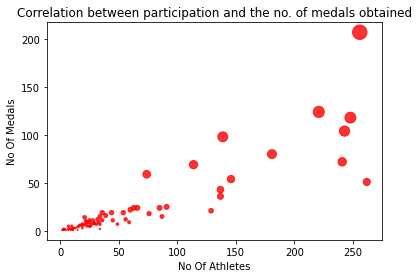

In [12]:
plt.scatter(df['No_Of_Athletes'],df['No_Of_Medals'] , c='red',s=df['No_Of_Medals'],alpha=0.8)
plt.title('Correlation between participation and the no. of medals obtained')
plt.xlabel('No Of Athletes')
plt.ylabel('No Of Medals')
plt.show()

In [54]:
# To find Correlation Coefficient 

df['No_Of_Athletes'].corr(df['No_Of_Medals'])

0.8801517677619507

## Observations

- Out of 162 participated countries, only 53% of them were able to obtain medals.
- There is a strong correlation between obtaining large no of medals and the participation. Thus, countries which does not obtain any medals need to increase the participation from their countries
- People's Republic of China, Great Britan, Republic of China,United States of America and Ukraine are the Top 5 Countries that has large no of medalists from their countries
- Out of 249 participated athletes, nearly 70% of them were able to obtain medals in People's Republic of China

<a class="anchor"  id="observations5"></a>

# Medalists Analysis

<a class="anchor"  id="medalistsanalysis"></a>

In [8]:
pd.read_sql('''SELECT COUNT(*) AS No_Of_Rows_In_Medals_Table 
               FROM Medals;''',db)
pd.read_sql('''SELECT COUNT(*) as No_Of_Columns_In_Medals_Table 
               FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME='Medals';''',db)

,No_Of_Rows_In_Medals_Table
0,2142


,No_Of_Columns_In_Medals_Table
0,7


In [52]:
# To get glimpse of medals table

pd.read_sql('''SELECT *
               FROM Medals
               LIMIT 5;''',db)

,Country,CountryCode,Name,Sport,SportCode,Event,Medal
0,Czech Republic,CZE,DRAHONINSKY David,Archery,ARC,Men's Individual - W1,Gold Medal
1,People's Republic of China,CHN,HE Zihao,Archery,ARC,Men's Individual Compound - Open,Gold Medal
2,United States of America,USA,MATHER Kevin,Archery,ARC,Men's Individual Recurve - Open,Gold Medal
3,People's Republic of China,CHN,CHEN Minyi,Archery,ARC,Women's Individual - W1,Gold Medal
4,Great Britain,GBR,PATERSON PINE Phoebe,Archery,ARC,Women's Individual Compound - Open,Gold Medal


### How many medalists are there in Tokyo Paralympics?

<a class="anchor"  id="mq1"></a>

In [50]:
pd.read_sql('''SELECT COUNT(DISTINCT Name) AS No_Of_Participated_Athletes
               FROM Athletes;''',db)

pd.read_sql('''SELECT COUNT(DISTINCT Name) AS No_Of_Medalists
               FROM Medals;''',db)


,No_Of_Participated_Athletes
0,4425


,No_Of_Medalists
0,1569


### Is there any athletes that they won more than one medal?

<a class="anchor"  id="mq2"></a>

In [26]:
pd.read_sql('''SELECT Name AS Name_Of_Athlete,Sport, COUNT(Name) AS No_Of_Medals
               FROM Medals
               GROUP BY Name
               HAVING COUNT(Name)>1
               ORDER BY COUNT(Name) DESC;''',db)

# The outcome may include from various events and sports

,Name_Of_Athlete,Sport,No_Of_Medals
0,KRYPAK Maksym,Swimming,7
1,RAIMONDI Stefano,Swimming,7
2,TRUSOV Andrii,Swimming,6
3,LONG Jessica,Swimming,6
4,SCHAER Manuela,Athletics,5
...,...,...,...
386,THOMAS Maxime,Table Tennis,2
387,MAI Ivan,Table Tennis,2
388,CHEBANIKA Raisa,Table Tennis,2
389,BARNEOUD Anne,Table Tennis,2


### Is there any athletes who won medals in more than one game?

<a class="anchor"  id="mq3"></a>

In [27]:
pd.read_sql('''SELECT DISTINCT(a.Name) AS Name_Of_Athletes,a.Sport AS Sport,b.Sport AS Sport
               FROM Medals AS a, Medals AS b
               WHERE a.Name= b.Name AND a.Sport<>b.Sport
               GROUP BY a.name;''',db)


,Name_Of_Athletes,Sport,Sport
0,PLAT Jetze,Triathlon,Cycling Road
1,ASTASHOV Mikhail,Cycling Track,Cycling Road
2,HICKS Darren,Cycling Track,Cycling Road
3,DUNLEVY Katie-George,Cycling Track,Cycling Road
4,MORELLI Shawn,Cycling Track,Cycling Road
5,LEAUTE Alexandre,Cycling Road,Cycling Track
6,BANGMA Tristan,Cycling Road,Cycling Track
7,METELKA Jozef,Cycling Road,Cycling Track
8,GRECO Paige,Cycling Road,Cycling Track
9,FACHIE Lora,Cycling Road,Cycling Track


### Does most of the medalists are male?

<a class="anchor"  id="mq4"></a>

In [12]:
pd.read_sql(''' WITH GenderOfAthletes AS ( 
                SELECT DISTINCT(m.Name),
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name )
               
                SELECT Gender,count(*) AS No_Of_Medalists from GenderOfAthletes 
                GROUP BY Gender;''',db)
# Since the Gender info of Athlets is not given in medals table, we will find gender for each of the athlets
# Out of 2569 participated Athlets whose gender is male, only 34.9% of Athlets were able to won medals
# Out of 1856 participated Athlets whose gender is female, 36% of Athlets were able to won medals

,Gender,No_Of_Medalists
0,Male,898
1,Female,671


### How many Gold, Silver and Bronze medalists are there?

<a class="anchor"  id="mq5"></a>

In [27]:
pd.read_sql('''SELECT CONCAT(ROUND((COUNT(*)/2142)*100,2),'%') AS Percentage_Of_Gold_Medalists
               FROM Medals
               WHERE Medal='Gold Medal';''',db)

pd.read_sql('''SELECT CONCAT(ROUND((COUNT(*)/2142)*100,2),'%') AS Percentage_Of_Silver_Medalists
               FROM Medals
               WHERE Medal='Silver Medal';''',db)

pd.read_sql('''SELECT CONCAT(ROUND((COUNT(*)/2142)*100,2),'%') AS Percentage_Of_Bronze_Medalists
               FROM Medals
               WHERE Medal='Bronze Medal';''',db)

,Percentage_Of_Gold_Medalists
0,32.59%


,Percentage_Of_Silver_Medalists
0,32.26%


,Percentage_Of_Bronze_Medalists
0,35.15%


### Percentage of medalists - Sports Wise

<a class="anchor"  id="mq6"></a>

In [13]:
pd.read_sql('''WITH Sports_ParticipationWise AS (
               SELECT Sport, COUNT(Name) AS No_Of_Athletes
               FROM Athletes
               GROUP BY Sport
               ORDER BY Sport),
               
               Sports_MedalWise AS (
               SELECT Sport, COUNT(Name) AS No_Of_Athletes
               FROM Medals
               GROUP BY Sport
               ORDER BY Sport)
               
               SELECT p.Sport, p.No_Of_Athletes AS No_Of_Participated_Athletes,
               CONCAT(ROUND((m.No_Of_Athletes/p.No_Of_Athletes) * 100,2),'%') AS Percentage_Of_Medalists
               FROM Sports_ParticipationWise AS p
               JOIN Sports_MedalWise AS m
               ON m.Sport=p.Sport
               ORDER BY Percentage_Of_Medalists DESC;''',db)


,Sport,No_Of_Participated_Athletes,Percentage_Of_Medalists
0,Swimming,604,85.76%
1,Wheelchair Fencing,96,75.00%
2,Table Tennis,278,65.47%
3,Badminton,90,60.00%
4,Cycling Road,213,50.70%
5,Equestrian,77,50.65%
6,Cycling Track,115,49.57%
7,Athletics,1142,44.66%
8,Wheelchair Rugby,92,39.13%
9,Football 5-a-side,78,38.46%


### In Which of the Sports, Athletes were able to obtain the large no. of gold medals?

<a class="anchor"  id="mq7"></a>

In [16]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Gold_Medalists
               FROM Medals
               WHERE Medal='Gold Medal'
               GROUP BY Sport
               ORDER BY COUNT(*) DESC 
               LIMIT 10;''',db)

,Sport,No_Of_Gold_Medalists
0,Swimming,175
1,Athletics,170
2,Table Tennis,48
3,Cycling Road,36
4,Sitting Volleyball,24
5,Wheelchair Basketball,24
6,Wheelchair Fencing,24
7,Powerlifting,20
8,Cycling Track,19
9,Badminton,18


### In Which of the Sports, there is least no. of gold medalists?

<a class="anchor"  id="mq8"></a>

In [39]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Gold_Medalists
               FROM Medals
               WHERE Medal='Gold Medal'
               GROUP BY Sport
               ORDER BY COUNT(*)
               LIMIT 10;''',db)

,Sport,No_Of_Gold_Medalists
0,Taekwondo,6
1,Triathlon,8
2,Canoe Sprint,9
3,Rowing,9
4,Wheelchair Tennis,9
5,Football 5-a-side,10
6,Archery,12
7,Wheelchair Rugby,12
8,Goalball,12
9,Shooting,13


### In Which of the Sports, Athlets were able to obtain the large no. of silver medals?

<a class="anchor"  id="mq9"></a>

In [40]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Silver_Medalists
               FROM Medals
               WHERE Medal='Silver Medal'
               GROUP BY Sport
               ORDER BY COUNT(*) DESC
               LIMIT 10;''',db)

,Sport,No_Of_Silver_Medalists
0,Athletics,171
1,Swimming,170
2,Table Tennis,46
3,Cycling Road,36
4,Sitting Volleyball,24
5,Wheelchair Fencing,24
6,Wheelchair Basketball,24
7,Powerlifting,20
8,Cycling Track,19
9,Badminton,18


### In Which of the Sports, there is least no. of silver medalists?

<a class="anchor"  id="mq10"></a>

In [41]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Silver_Medalists
               FROM Medals
               WHERE Medal='Silver Medal'
               GROUP BY Sport
               ORDER BY COUNT(*)
               LIMIT 10;''',db)

,Sport,No_Of_Silver_Medalists
0,Taekwondo,6
1,Triathlon,8
2,Wheelchair Tennis,9
3,Canoe Sprint,9
4,Rowing,9
5,Football 5-a-side,10
6,Archery,12
7,Goalball,12
8,Wheelchair Rugby,12
9,Shooting,13


### In Which of the Sports, Athlets were able to obtain the large no. of Bronze medals?

<a class="anchor"  id="mq11"></a>

In [42]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Bronze_Medalists
               FROM Medals
               WHERE Medal='Bronze Medal'
               GROUP BY Sport
               ORDER BY COUNT(*) DESC
               LIMIT 10;''',db)

,Sport,No_Of_Bronze_Medalists
0,Swimming,173
1,Athletics,169
2,Table Tennis,88
3,Cycling Road,36
4,Judo,26
5,Wheelchair Fencing,24
6,Wheelchair Basketball,24
7,Sitting Volleyball,23
8,Powerlifting,20
9,Cycling Track,19


### Which sport has least no. of Bronze medalists?

<a class="anchor"  id="mq12"></a>

In [29]:
pd.read_sql('''SELECT Sport, COUNT(*) AS No_Of_Bronze_Medalists
               FROM Medals
               WHERE Medal='Bronze Medal'
               GROUP BY Sport
               ORDER BY COUNT(*) 
               LIMIT 10;''',db)

,Sport,No_Of_Bronze_Medalists
0,Triathlon,8
1,Wheelchair Tennis,9
2,Canoe Sprint,9
3,Rowing,9
4,Football 5-a-side,10
5,Archery,12
6,Taekwondo,12
7,Wheelchair Rugby,12
8,Goalball,12
9,Equestrian,13


### What is the age group of majority of the medalists in paralympics?

<a class="anchor"  id="mq13"></a>

In [14]:
pd.read_sql(''' WITH AgeOfMedalists AS ( 
                SELECT DISTINCT(m.Name) AS Name,
                CASE 
                WHEN m.Name = a.Name THEN a.Age
                ELSE ''
                END AS Age
                FROM Medals AS m 
                LEFT JOIN Athletes AS a
                ON a.Name=m.Name AND a.CountryCode=m.CountryCode AND a.SportCode=m.SportCode),
                
                AgeBuckets AS (
                SELECT Name,Age,
                CASE
                WHEN Age BETWEEN 10 AND 17 THEN 'Under 18'
                WHEN Age BETWEEN 18 AND 24 THEN 'Between 18 And 24'
                WHEN Age BETWEEN 25 AND 34 THEN 'Between 25 And 34'
                WHEN Age BETWEEN 35 AND 44 THEN 'Between 35 And 44'
                WHEN Age BETWEEN 45 AND 54 THEN 'Between 45 And 54'
                WHEN Age BETWEEN 55 AND 64 THEN 'Between 55 And 64'
                ELSE 'Above 65'
                END AS AgeBucket
                FROM AgeOfMedalists)
                
                SELECT AgeBucket, COUNT(Name) No_Of_Medalists
                FROM AgeBuckets
                GROUP BY AgeBucket
                ORDER BY COUNT(Name) DESC;''',db)
                

,AgeBucket,No_Of_Medalists
0,Between 25 And 34,714
1,Between 35 And 44,371
2,Between 18 And 24,350
3,Between 45 And 54,110
4,Under 18,13
5,Between 55 And 64,11


### What is the gender of most of the medalists?

<a class="anchor"  id="mq14"></a>

In [16]:
pd.read_sql(''' WITH GenderOfGoldMedalists AS ( 
                SELECT DISTINCT(m.Name),
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name AND Medal='Gold Medal' )
               
                SELECT Gender,count(*) AS No_Of_Gold_Medalists 
                FROM GenderOfGoldMedalists 
                GROUP BY Gender;''',db)

pd.read_sql(''' WITH GenderOfSilverMedalists AS ( 
                SELECT DISTINCT(m.Name),
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name AND Medal='Silver Medal' )
               
                SELECT Gender,count(*) AS No_Of_Silver_Medalists 
                FROM GenderOfSilverMedalists 
                GROUP BY Gender;''',db)

pd.read_sql(''' WITH GenderOfBronzeMedalists AS ( 
                SELECT DISTINCT(m.Name),
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name AND Medal='Bronze Medal' )
               
                SELECT Gender,count(*) AS No_Of_Bronze_Medalists 
                FROM GenderOfBronzeMedalists 
                GROUP BY Gender;''',db)

pd.read_sql(''' WITH GenderOfAllMedalists AS ( 
                SELECT DISTINCT(m.Name),
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name )
               
                SELECT Gender,count(*) AS No_Of_Medalists 
                FROM GenderOfAllMedalists 
                GROUP BY Gender;''',db)


,Gender,No_Of_Gold_Medalists
0,Male,320
1,Female,242


,Gender,No_Of_Silver_Medalists
0,Male,348
1,Female,264


,Gender,No_Of_Bronze_Medalists
0,Male,388
1,Female,305


,Gender,No_Of_Medalists
0,Male,898
1,Female,671


## Observations

- 57% of Medalists in Tokyo 2020 paralmpics are male and 42.7% of Medalists are female
- 45.5% of Medalists are aged between 25 and 34, 23.6% of Medalists are aged between 35 and 44, 23.3% of Medalists are aged between 18 and 24 and 7% of Medalists are aged between 45 to 54
- 35% of Medalists have bronze medals and nearly 32% of Medalists own gold and silver medals
- Games such as Swimming, Wheelchair Fencing and Table Tennis has high chance of obtaining medals
- There are totally 102 no of Athlets who participated in 2 sports in paralympics. Out of them, only 18 Athlets were able to won medals in both of the sports
- Most of the Medalists are from Athletics and Swimming Sports

<a class="anchor"  id="observations6"></a>

## Analysis of India

<a class="anchor"  id="analysisofinida"></a>

### How many athletes were participated in Tokyo parlympics from India?

<a class="anchor"  id="aiq1"></a>

In [26]:
pd.read_sql('''SELECT COUNT(*) AS No_Of_Participated_Athletes_In_India
               FROM Athletes
               WHERE Country = 'India';''',db)

pd.read_sql('''SELECT *
               FROM Athletes
               WHERE Country = 'India'
               LIMIT 10;''',db)

,No_Of_Participated_Athletes_In_India
0,54


,Name,Country,CountryCode,Sport,SportCode,Gender,Age
0,Ajeet singh,India,IND,Athletics,ATH,Male,28
1,Akash,India,IND,Shooting,SHO,Male,31
2,Aruna,India,IND,Taekwondo,TKW,Female,22
3,Arvind,India,IND,Athletics,ATH,Male,28
4,Babu sidhartha,India,IND,Shooting,SHO,Male,42
5,Bhagat pramod,India,IND,Badminton,BDM,Male,33
6,Bhati ranjeet,India,IND,Athletics,ATH,Male,25
7,Bhati varun singh,India,IND,Athletics,ATH,Male,27
8,Bhyan ekta,India,IND,Athletics,ATH,Female,36
9,Deepak,India,IND,Shooting,SHO,Male,39


### How many male and female Athletes are there from India?

<a class="anchor"  id="aiq2"></a>

In [18]:
pd.read_sql('''SELECT Gender,COUNT(DISTINCT Name) No_Of_Participated_Athletes
               FROM Athletes
               WHERE Country ='India'
               GROUP BY Gender
               ORDER BY COUNT(Name) DESC;''',db)
# There are no Athlets from India who participated in more than one games

,Gender,No_Of_Participated_Athletes
0,Male,40
1,Female,14


### Which of the different sports games were competed by Indian Athletes?

<a class="anchor"  id="aiq3"></a>

In [19]:
# for printing all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.read_sql( ''' SELECT COUNT(DISTINCT Sport) AS No_Of_Sports_Participated_By_Indian_Athletes
                 FROM Athletes
                 WHERE Country = 'India';''',db)

pd.read_sql('''SELECT Sport, COUNT(Name) No_Of_Athletes
               FROM Athletes
               WHERE Country ='India'
               GROUP BY Sport
               ORDER BY COUNT(Name) DESC
               LIMIT 10;''',db)

,No_Of_Sports_Participated_By_Indian_Athletes
0,9


,Sport,No_Of_Athletes
0,Athletics,24
1,Shooting,10
2,Badminton,7
3,Archery,5
4,Swimming,2
5,Powerlifting,2
6,Table Tennis,2
7,Taekwondo,1
8,Canoe Sprint,1


### Which of the Sports Genres were not participated by Indian Athlets?

<a class="anchor"  id="aiq4"></a>

In [20]:
pd.read_sql('''SELECT DISTINCT(a.Sport)
               FROM Athletes AS a
               WHERE NOT EXISTS (
               SELECT DISTINCT(b.Sport) 
               FROM Athletes AS b 
               WHERE b.country='India' AND a.Sport=b.Sport);''',db)

,Sport
0,Judo
1,Wheelchair Basketball
2,Sitting Volleyball
3,Wheelchair Fencing
4,Cycling Road
5,Cycling Track
6,Football 5-a-side
7,Triathlon
8,Equestrian
9,Boccia


### Which age group of Athletes competes the most in Paralympics from india?

<a class="anchor"  id="aiq5"></a>

In [21]:
pd.read_sql('''SELECT
               CASE
               WHEN Age BETWEEN 10 AND 17 THEN 'Under 18'
               WHEN Age BETWEEN 18 AND 24 THEN 'Between 18 And 24'
               WHEN Age BETWEEN 25 AND 34 THEN 'Between 25 And 34'
               WHEN Age BETWEEN 35 AND 44 THEN 'Between 35 And 44'
               WHEN Age BETWEEN 45 AND 54 THEN 'Between 45 And 54'
               WHEN Age BETWEEN 55 AND 64 THEN 'Between 55 And 64'
               ELSE 'Above 65'
               END AS AgeBucket,
               COUNT(Name) No_Of_Athletes_From_India
               FROM Athletes
               WHERE CountryCode = 'IND'
               GROUP BY AgeBucket
               ORDER BY COUNT(Name) DESC;''',db)

# India need to encourage the children aged under 18 to participate in paralympics

,AgeBucket,No_Of_Athletes_From_India
0,Between 25 And 34,27
1,Between 35 And 44,14
2,Between 18 And 24,12
3,Between 45 And 54,1


### What is the Rank of India by participation and medals wise?

<a class="anchor"  id="aiq6"></a>

In [34]:
pd.read_sql(''' WITH RankByParticipation as (
               SELECT Country,COUNT(Name) AS No_Of_Athletes,
               DENSE_RANK() OVER (ORDER BY COUNT(Name) DESC) AS RankByParticipation
               FROM Athletes
               GROUP BY Country)
               
               SELECT *
               FROM RankByParticipation
               WHERE Country='India';''',db)

pd.read_sql('''SELECT Country,Gold AS No_Of_Gold_Medals,Silver AS No_Of_Silver_Medals,Bronze AS No_Of_Bronze_Medals,
               Total AS No_Of_Medals, RankByTotal AS RankByMedals
               FROM Medals_Tally
               WHERE CountryCode = 'IND';''',db)

,Country,No_Of_Athletes,RankByParticipation
0,India,54,23


,Country,No_Of_Gold_Medals,No_Of_Silver_Medals,No_Of_Bronze_Medals,No_Of_Medals,RankByMedals
0,India,5,8,6,19,20


### In which of the Sports Genre, India won the medals?

<a class="anchor"  id="aiq7"></a>

In [75]:
pd.read_sql('''SELECT Sport, COUNT(Name) AS No_Of_Medalists
               FROM Medals
               WHERE CountryCode = 'IND' 
               GROUP BY Sport
               ORDER BY No_Of_Medalists DESC;''',db)

,Sport,No_Of_Medalists
0,Athletics,8
1,Shooting,5
2,Badminton,4
3,Table Tennis,1
4,Archery,1


### In Which of the Sports Genre, India won the Gold Medals?

<a class="anchor"  id="aiq8"></a>

In [69]:
pd.read_sql('''SELECT Sport, COUNT(Name) AS No_Of_Gold_Medalists
               FROM Medals
               WHERE CountryCode = 'IND' AND Medal='Gold Medal'
               GROUP BY Sport
               ORDER BY No_Of_Gold_Medalists DESC;''',db)

,Sport,No_Of_Gold_Medalists
0,Badminton,2
1,Shooting,2
2,Athletics,1


### In Which of the Sports Genre, India won the Silver Medals?

<a class="anchor"  id="aiq9"></a>

In [70]:
pd.read_sql('''SELECT Sport, COUNT(Name) AS No_Of_Gold_Medalists
               FROM Medals
               WHERE CountryCode = 'IND' AND Medal='Silver Medal'
               GROUP BY Sport
               ORDER BY No_Of_Gold_Medalists DESC;''',db)

,Sport,No_Of_Gold_Medalists
0,Athletics,5
1,Badminton,1
2,Shooting,1
3,Table Tennis,1


### In Which of the Sports Genre, India won the Bronze Medals?

<a class="anchor"  id="aiq10"></a>

In [71]:
pd.read_sql('''SELECT Sport, COUNT(Name) AS No_Of_Gold_Medalists
               FROM Medals
               WHERE CountryCode = 'IND' AND Medal='Bronze Medal'
               GROUP BY Sport
               ORDER BY No_Of_Gold_Medalists DESC;''',db)

,Sport,No_Of_Gold_Medalists
0,Athletics,2
1,Shooting,2
2,Archery,1
3,Badminton,1


### What is the gender of majority of Medalists from India?

<a class="anchor"  id="aiq11"></a>

In [28]:
pd.read_sql(''' WITH GenderOfAllMedalists AS ( 
                SELECT m.Name,
                CASE 
                WHEN a.Name = m.Name THEN a.Gender
                ELSE ''
                END AS Gender
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name AND m.CountryCode='IND' )
               
                SELECT Gender,count(*) AS No_Of_Medalists_From_India 
                FROM GenderOfAllMedalists 
                GROUP BY Gender;''',db)


,Gender,No_Of_Medalists_From_India
0,Male,16
1,Female,3


### What is the age group of majority of Medalists from India?

<a class="anchor"  id="aiq12"></a>

In [23]:
pd.read_sql(''' WITH AgeOfAllMedalists AS ( 
                SELECT DISTINCT(m.Name) AS Name,
                CASE 
                WHEN a.Name = m.Name THEN a.Age
                ELSE ''
                END AS Age
                FROM Medals AS m 
                JOIN Athletes AS a
                ON a.Name=m.Name 
                WHERE a.Name=m.Name AND m.CountryCode='IND'),
                AgeBuckets AS (
                SELECT Name,Age,
                CASE
                WHEN Age BETWEEN 10 AND 17 THEN 'Under 18'
                WHEN Age BETWEEN 18 AND 24 THEN 'Between 18 And 24'
                WHEN Age BETWEEN 25 AND 34 THEN 'Between 25 And 34'
                WHEN Age BETWEEN 35 AND 44 THEN 'Between 35 And 44'
                WHEN Age BETWEEN 45 AND 54 THEN 'Between 45 And 54'
                WHEN Age BETWEEN 55 AND 64 THEN 'Between 55 And 64'
                ELSE 'Above 65'
                END AS AgeBucket
                FROM AgeOfAllMedalists)
                SELECT AgeBucket, COUNT(Name) No_Of_Medalists
                FROM AgeBuckets
                GROUP BY AgeBucket
                ORDER BY COUNT(Name) DESC;''',db)


,AgeBucket,No_Of_Medalists
0,Between 25 And 34,7
1,Between 18 And 24,6
2,Between 35 And 44,4


### In Which of the Sports Indian Athlets were able to attain large no of medals comparing to the total no of participated athlets?

<a class="anchor"  id="aiq13"></a>

In [25]:
pd.read_sql('''WITH Sports_ParticipationWise AS (
               SELECT Sport, COUNT(Name) AS No_Of_Athletes
               FROM Athletes
               WHERE CountryCode = 'IND'
               GROUP BY Sport
               ORDER BY Sport),
               
               Sports_MedalWise AS (
               SELECT Sport, COUNT(Name) AS No_Of_Athletes
               FROM Medals
               WHERE CountryCode = 'IND'
               GROUP BY Sport
               ORDER BY Sport)
               
               SELECT p.Sport, p.No_Of_Athletes AS No_Of_Participated_Athletes,
               CONCAT(ROUND((m.No_Of_Athletes/p.No_Of_Athletes) * 100,2),'%') AS Percentage_Of_Medalists
               FROM Sports_ParticipationWise AS p
               JOIN Sports_MedalWise AS m
               ON m.Sport=p.Sport
               ORDER BY Percentage_Of_Medalists DESC;''',db)


,Sport,No_Of_Participated_Athletes,Percentage_Of_Medalists
0,Badminton,7,57.14%
1,Shooting,10,50.00%
2,Table Tennis,2,50.00%
3,Athletics,24,33.33%
4,Archery,5,20.00%


### Is there any athletes from India who has won more than one medal?

<a class="anchor"  id="aiq14"></a>

In [33]:
pd.read_sql('''SELECT Name, COUNT(Name) AS No_Of_Medals
               FROM Medals
               WHERE Country='India'
               GROUP BY Name
               HAVING COUNT(Name) > 1;''',db)

,Name,No_Of_Medals
0,LEKHARA Avani,2
1,SINGHRAJ,2


## Observations

- India has contributed only 1% of participation in Tokyo Paralympics 2020
- India need to encourage more female athletes since the participation of female athletes is only 26%
- Majority of the Medalists are Male
- Only 2 athletes were able to obtain more than one medal in paralympics from India
- All of the athletes from India have participated in only 9 different sports and need to encourage more athletes from its country to participate in rest of the 14 games
- India must encourage children with different abilities who are under 18 to participate in paralympics in future and it should create awareness about this among the children
- Most of the Indian Athletes and Medalists are aged between 18 and 44
- India has the rank of 23 by participation and the rank of 20 by the count of medals in paralympics
- Majority of the India Medalists are from Athletics game

<a class="anchor"  id="observations7"></a>